In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


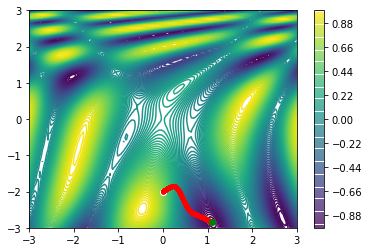

[1.0996241267851623, -2.85221983459217]
-0.9999999981720762
1676


In [2]:
from numpy.core.fromnumeric import resize

func = lambda th: np.sin(1/2 * th[0]**2 - 1/4 * th[1] ** 2 +3) * np.cos(2*th[0]+1-np.e**th[1])

#Representamos la función
_x =np.linspace(-3,3, 100)
_y =np.linspace(-3,3, 100)
_z=np.zeros((100,100))

for ix, x in enumerate(_x):
  for iy, y in enumerate(_y):
    _z[iy,ix]=func([x,y])

plt.contour(_x,_y,_z,100)
plt.colorbar()

#Algoritmo Adadelta
Theta = [0,-2]
li=0.9
E=10**(-8)
plt.plot(Theta[0],Theta[1], "o", c = "white")

grad=np.zeros(2)
Var=[0,0]
Eg = [0,0]
Evar=[0,0]
Thetaold = [0,0]
contador= 0
diferencia=1

for _ in range(10000):

  if diferencia < 10**-5:
    break
  else:
    grad[0] = -2*np.sin(2*Theta[0]+1-np.e**Theta[1])*np.sin(1/2*Theta[0]**2 -1/4* Theta[1]**2+3) + Theta[0]*np.cos(2*Theta[0]+1-np.e**Theta[1])*np.cos(1/2*Theta[0]**2-1/4*Theta[1]**2+3)
    grad[1]= np.e**Theta[1]*np.sin(2*Theta[0]+1-np.e**Theta[1])*np.sin(1/2*Theta[0]**2-1/4*Theta[1]**2+3)-1/2*Theta[1]*np.cos(2*Theta[0]+1-np.e**Theta[1])*np.cos(1/2*Theta[0]**2 -1/4*Theta[1]**2+3)
   #print(grad)


    for it, th in enumerate(Theta):
      Eg[it]= li*Eg[it]+ (1-li)*grad[it]**2
      Evar[it]= li*Evar[it]+ (1-li)*Var[it]**2

    #print(Eg)
    #print(Evar)

    for it, th in enumerate(Theta): 
      Thetaold [it] = Theta[it]
      Theta[it] = Theta[it] - np.sqrt(Evar[it]+E)*grad[it]/ np.sqrt(Eg[it]+E)
      Var[it]= Theta[it]-Thetaold[it]
    plt.plot(Theta[0],Theta[1], ".", c = "red")

    diferencia=np.sqrt((Thetaold[0]-Theta[0])**2+(Thetaold[1]-Theta[1])**2)
    #print(diferencia)
    contador=contador+1

plt.plot(Theta[0],Theta[1], "o", c = "green")  
plt.show()
print(Theta)
print(func(Theta))
print(contador)

